In [1]:
import emd
import numpy as np
from scipy import ndimage

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
peak_freq = 15
sample_rate = 256
seconds = 10
noise_std = 0.4

In [3]:
x = emd.simulate.ar_oscillator(peak_freq, sample_rate, seconds, noise_std=noise_std, random_seed=42, r=0.96)[:, 0]

In [26]:
len(x)

2560

In [4]:
x = x*1e-4

In [5]:
t = np.linspace(0, seconds, seconds*sample_rate)

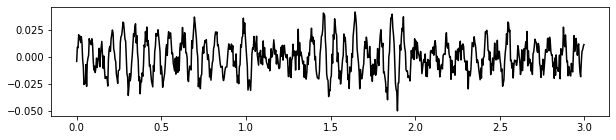

In [6]:
plt.figure(figsize=(10,2))
plt.plot(t[:sample_rate*3], x[:sample_rate*3], color='k');

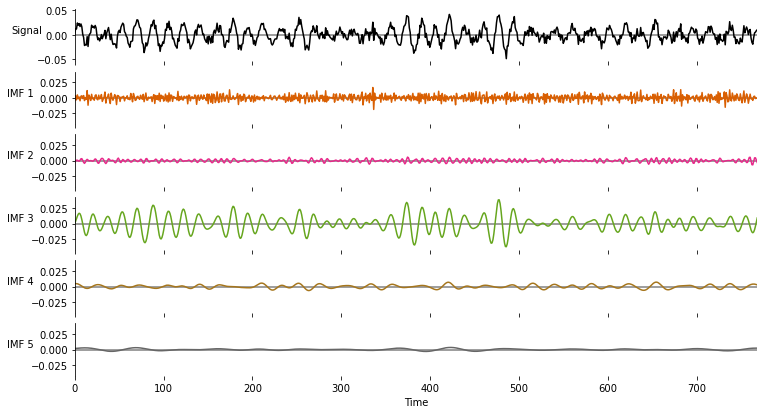

In [11]:
fig = plt.figure(figsize=(12,6))
imf = emd.sift.mask_sift(x, max_imfs=5)

emd.plotting.plot_imfs(imf[:sample_rate*3, :], cmap=True, scale_y=True, fig=fig)


In [8]:
IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'nht')

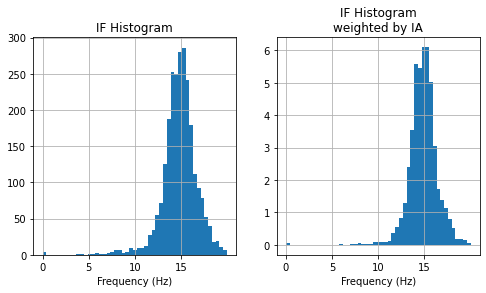

In [13]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
# Plot a simple histogram using frequency bins from 0-20Hz
plt.hist(IF[:, 2], np.linspace(0, 20))
plt.grid(True)
plt.title('IF Histogram')
plt.xticks(np.arange(0, 20, 5))
plt.xlabel('Frequency (Hz)')

plt.subplot(122)
# Plot an amplitude-weighted histogram using frequency bins from 0-20Hz
plt.hist(IF[:, 2], np.linspace(0, 20), weights=IA[:, 2])
plt.grid(True)
plt.title('IF Histogram\nweighted by IA')
plt.xticks(np.arange(0, 20, 5))
plt.xlabel('Frequency (Hz)')
plt.show()

In [14]:
freq_edges, freq_centres = emd.spectra.define_hist_bins(1,5,4)
print(f'Bin edges: {freq_edges}')
print(f'Bin centres: {freq_centres}')

Bin edges: [1. 2. 3. 4. 5.]
Bin centres: [1.5 2.5 3.5 4.5]


In [15]:
freq_edges, freq_centres = emd.spectra.define_hist_bins(1, 50, 8, 'log')

# We round the values to 3dp for easier visualisation
print('Bin Edges:   {0}'.format(np.round(freq_edges, 3)))
print('Bin Centres: {0}'.format(np.round(freq_centres, 3)))

Bin Edges:   [ 1.     1.631  2.659  4.336  7.071 11.531 18.803 30.662 50.   ]
Bin Centres: [ 1.315  2.145  3.498  5.704  9.301 15.167 24.732 40.331]


In [16]:
freq_edges, freq_centres = emd.spectra.define_hist_bins(0, 100, 128, 'linear')

f, spec_weighted = emd.spectra.hilberthuang(IF, IA, freq_edges, sum_imfs=False)

f, spec_unweigthed = emd.spectra.hilberthuang(IF, np.ones_like(IA), freq_edges, sum_imfs=False)

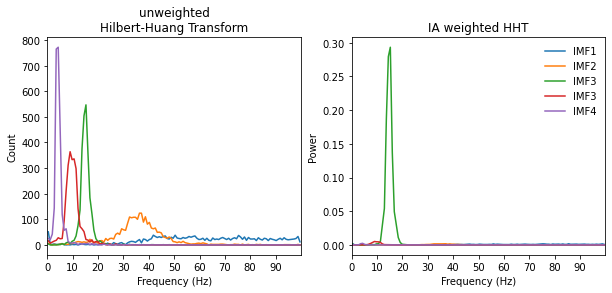

In [25]:
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=0.4)
plt.subplot(121)
plt.plot(freq_centres, spec_unweigthed)
plt.xticks(np.arange(10)*10)
plt.xlim(0, 100)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count')
plt.title('unweighted\nHilbert-Huang Transform')

plt.subplot(122)
plt.plot(freq_centres, spec_weighted)
plt.xticks(np.arange(10)*10)
plt.xlim(0,100)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('IA weighted HHT')
plt.legend(['IMF1', 'IMF2', 'IMF3', 'IMF3', 'IMF4', 'IMF5'], frameon=False)
plt.show()


## 2D

In [32]:
freq_edges, freq_centres = emd.spectra.define_hist_bins(1, 25, 24, 'linear')

f, hht = emd.spectra.hilberthuang(IF[:, 2, None], IA[:, 2, None], freq_edges, mode='amplitude', sum_time=False)
time_centres = np.arange(201)-0.5

Text(0, 0.5, 'Frequency (Hz)')

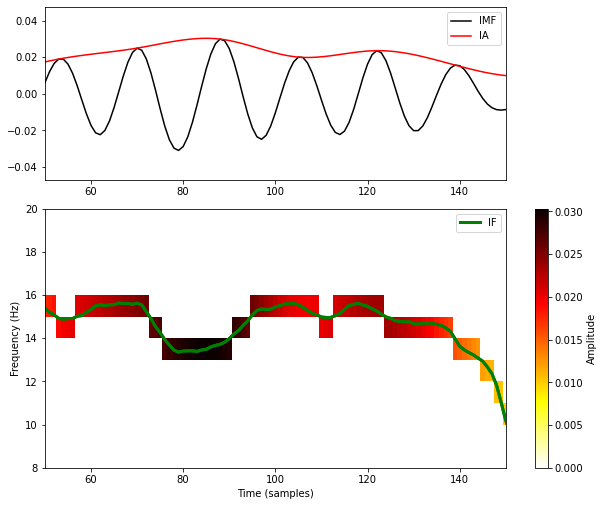

In [48]:
plt.figure(figsize=(10,8))

plt.axes([.1, .6, .64, .3])
plt.plot(imf[:, 2], 'k')
plt.plot(IA[:, 2], 'r')
plt.legend(['IMF', 'IA'])
plt.xlim(50, 150)
plt.axes([.1, .1, .8, .45])
plt.plot(IF[:, 2], 'g', lw=3)
plt.legend(['IF'])

plt.pcolormesh(time_centres, freq_edges, hht[:, :200], cmap='hot_r', vmin=0)
# Set colourbar
cb = plt.colorbar()
cb.set_label('Amplitude', rotation=90)

# Overlay the IF again for better visualisation
plt.plot(IF[:, 2], 'g', linewidth=3)

# Set lims and labels
plt.xlim(50, 150)
plt.ylim(8, 20)
plt.xlabel('Time (samples)')
plt.ylabel('Frequency (Hz)')

Text(0, 0.5, 'Frequency (Hz)')

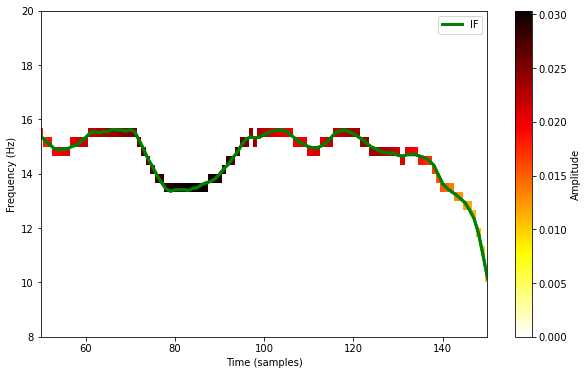

In [50]:
# Carrier frequency histogram definition
freq_edges, freq_centres = emd.spectra.define_hist_bins(1, 25, 24*3, 'linear')

f, hht = emd.spectra.hilberthuang(IF[:, 2], IA[:, 2], freq_edges, mode='amplitude', sum_time=False)
time_centres = np.arange(201)-.5

# Create summary figure

plt.figure(figsize=(10, 6))
plt.plot(IF[:, 2], 'g', linewidth=3)
plt.legend(['IF'])

# Plot HHT
plt.pcolormesh(time_centres, freq_edges, hht[:, :200], cmap='hot_r', vmin=0)

# Set colourbar
cb = plt.colorbar()
cb.set_label('Amplitude', rotation=90)

# Overlay the IF again for better visualisation
plt.plot(IF[:, 2], 'g', linewidth=3)

# Set lims and labels
plt.xlim(50, 150)
plt.ylim(8, 20)
plt.xlabel('Time (samples)')
plt.ylabel('Frequency (Hz)')

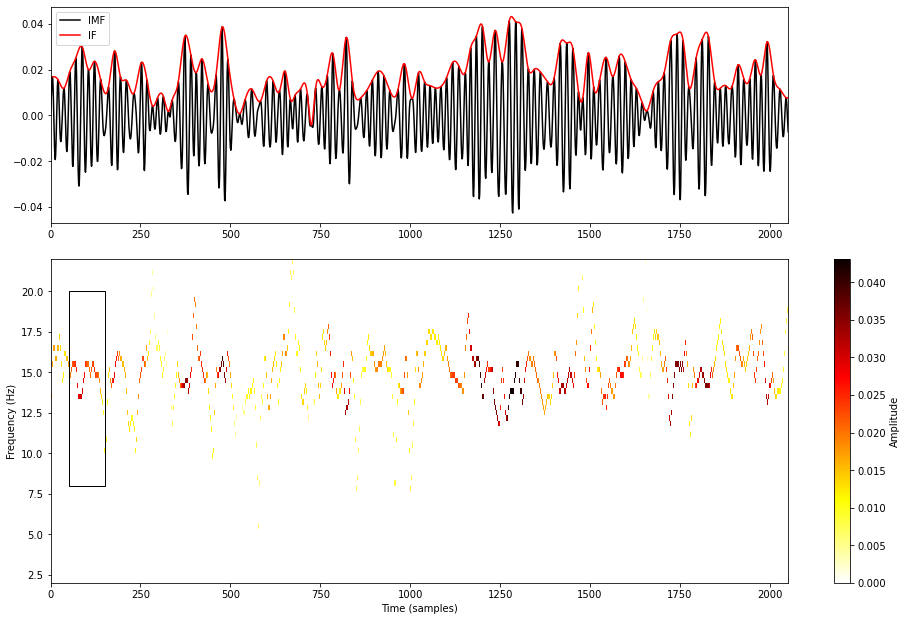

In [54]:
#Carrier frequency histogram definition
freq_edges, freq_centres = emd.spectra.define_hist_bins(1, 25, 24*3, 'linear')

f, hht = emd.spectra.hilberthuang(IF[:, 2], IA[:, 2], freq_edges, mode='amplitude', sum_time=False)
time_centres = np.arange(2051)-.5

plt.figure(figsize=(16, 10))
# Add signal and IA
plt.axes([.1, .6, .64, .3])
plt.plot(imf[:, 2], 'k')
plt.plot(IA[:, 2], 'r')
plt.legend(['IMF', 'IF'])
plt.xlim(0, 2050)

# Add IF axis and legend
plt.axes([.1, .1, .8, .45])

# Plot HHT
plt.pcolormesh(time_centres, freq_edges, hht[:, :2050], cmap='hot_r', vmin=0)

# Set colourbar
cb = plt.colorbar()
cb.set_label('Amplitude', rotation=90)

# Set lims and labels
plt.xlim(0, 2050)
plt.ylim(2, 22)
plt.xlabel('Time (samples)')
plt.ylabel('Frequency (Hz)')

rect = patches.Rectangle((50, 8), 100, 12, edgecolor='k', facecolor='none')
plt.gca().add_patch(rect)

Text(0, 0.5, 'Frequency (Hz)')

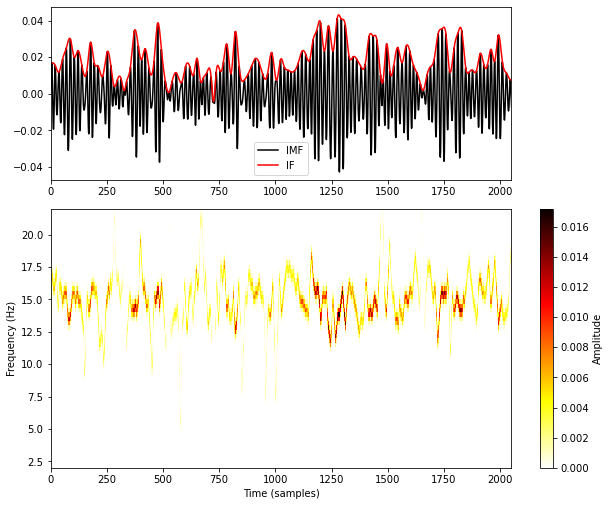

In [86]:
# Carrier frequency histogram definition
freq_edges, freq_centres = emd.spectra.define_hist_bins(1, 25, 24*3, 'linear')

f, hht = emd.spectra.hilberthuang(IF[:, 2], IA[:, 2], freq_edges, mode='amplitude', sum_time=False)
time_centres = np.arange(2051)-.5

# Apply smoothing
hht = ndimage.gaussian_filter(hht, 1)

plt.figure(figsize=(10, 8))
# Add signal and IA
plt.axes([.1, .6, .64, .3])
plt.plot(imf[:, 2], 'k')
plt.plot(IA[:, 2], 'r')
plt.legend(['IMF', 'IF'])
plt.xlim(0, 2050)

# Add IF axis and legend
plt.axes([.1, .1, .8, .45])

# Plot HHT
plt.pcolormesh(time_centres, freq_edges, hht[:, :2050], cmap='hot_r', vmin=0, )

# Set colourbar
cb = plt.colorbar()
cb.set_label('Amplitude', rotation=90)

# Set lims and labels
plt.xlim(0, 2050)
plt.ylim(2, 22)
plt.xlabel('Time (samples)')
plt.ylabel('Frequency (Hz)')
